<a href="https://colab.research.google.com/github/Catherine-Nguyen88/project_chd/blob/main/CHD_Rhiannon's_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rhiannon's Part

In [39]:
#Initial Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## 1. Cleaning/Transforming Data

In [4]:
train_data = pd.read_csv('https://raw.githubusercontent.com/Catherine-Nguyen88/project_chd/main/fhs_train.csv', low_memory=False)
test_data = pd.read_csv('https://raw.githubusercontent.com/Catherine-Nguyen88/project_chd/main/fhs_test.csv', low_memory=False)

# clean training data
train_data1 = train_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

train_final = train_data1.loc[:,['sex', 'currentSmoker', 'cigsPerDay',
                          'diabetes', 'totChol', 'sysBP',
                          'diaBP', 'BMI', 'TenYearCHD']]
train_final1 = train_final.dropna()

# clean testing data
test_data1 = test_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
test_final = test_data1.loc[:,['sex', 'currentSmoker', 'cigsPerDay',
                                'diabetes', 'totChol', 'sysBP',
                                  'diaBP', 'BMI', 'TenYearCHD']]
test_final1 = test_final.dropna()

## 2. KNN Regression

In [6]:
#Splitting Sample
y_train = train_final1['TenYearCHD']
x_train = train_final1.drop('TenYearCHD', axis=1)

y_test = test_final1['TenYearCHD']
x_test = test_final1.drop('TenYearCHD', axis=1)

In [7]:
#Maxmin Normlize
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
#KNN Regressor
for k in [3, 10, 25, 50, 100, 101, 125, 150, 200, 300]:
  model = KNeighborsRegressor(n_neighbors=k).fit(x_train_scaled, y_train)
  yhat = model.predict(x_test_scaled)
  mse = np.sum((y_test - yhat)**2)
  print('k: '+str(k)+', MSE: '+str(mse))

k: 3, MSE: 161.33333333333334
k: 10, MSE: 133.81
k: 25, MSE: 126.3232
k: 50, MSE: 125.256
k: 100, MSE: 123.6674
k: 101, MSE: 123.6971865503382
k: 125, MSE: 124.027264
k: 150, MSE: 124.56924444444444
k: 200, MSE: 125.27042499999999
k: 300, MSE: 125.82936666666666


The MSE appears to decrease steadily as k increases to 100. However, as k is greater than 100, the MSE appears to start increasing again.

[108]


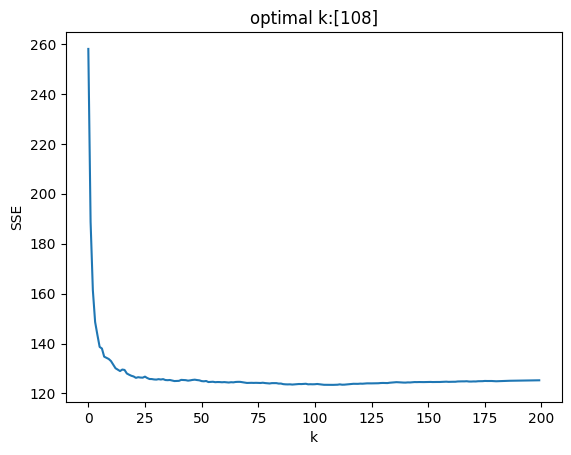

In [29]:
#Optimal K for the data
kbar = 200
kgrid = np.arange(1,kbar)
SSE = np.zeros(kbar)

for k in range(kbar):
  fitModel = KNeighborsRegressor(n_neighbors=k+1).fit(x_train_scaled, y_train)
  yhat = fitModel.predict(x_test_scaled) #Predict for values test
  SSE[k] = np.sum((y_test - yhat)**2)

SSEmin = np.min(SSE) #Lowest SSE
minIndex = np.where(SSE==SSEmin)
kstar = kgrid[minIndex]
print(kstar)

plt.plot(np.arange(0,kbar), SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(kstar))
plt.ylabel('SSE')
plt.show()

In the plot created above, the optimal k is around 108, so for k when I originally fit the KNN regression model, k=3, 10, 25, and 50 are probably underfitting while k= 125, 150, 200, 300 are likely overfitting the model. It could be argued that k=100 and 101 could be underfitting the model, however, they are the closest ones in our dataset which means they are likely closest to the answer.

In [31]:
#Re-training the model with the best K value
model1 = KNeighborsRegressor(n_neighbors=108).fit(x_train_scaled, y_train)
yhat1 = model1.predict(x_test_scaled)
mse = np.sum((y_test - yhat1)**2)
print(mse)
#The mean-squared error of a KNN model with k=108 is 123.41666

123.41666666666666


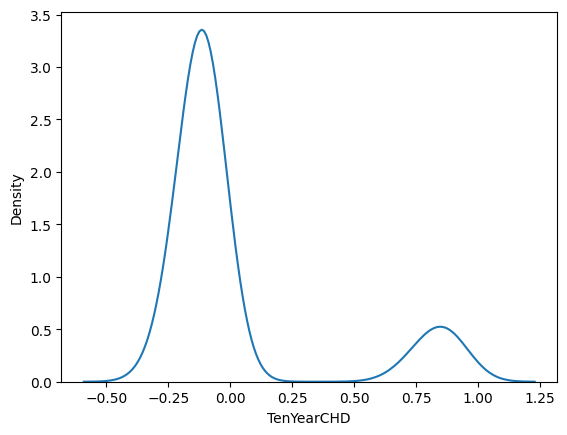

R-squared: 0.04948041477436471
RMSE: 0.34431943854578806


In [38]:
#Residuals, R-Squared, RMSE
error = y_test - yhat1
sns.kdeplot(error)
plt.show()
rsq = 1-np.sum(error**2)/np.sum((y_test-np.mean(y_train))**2)
rmse = np.sqrt(np.mean(error**2))

print('R-squared:', rsq)
print('RMSE:', rmse)

The R-squared value is extremely low (~4.95%), meaning the models' predictions are probably not accurate at all.

The RMSE also indicates that the model's predictions are off by approximately 0.344 units meaning that this model's predictions are most likely not accurate or reliable.

## 3. KMC

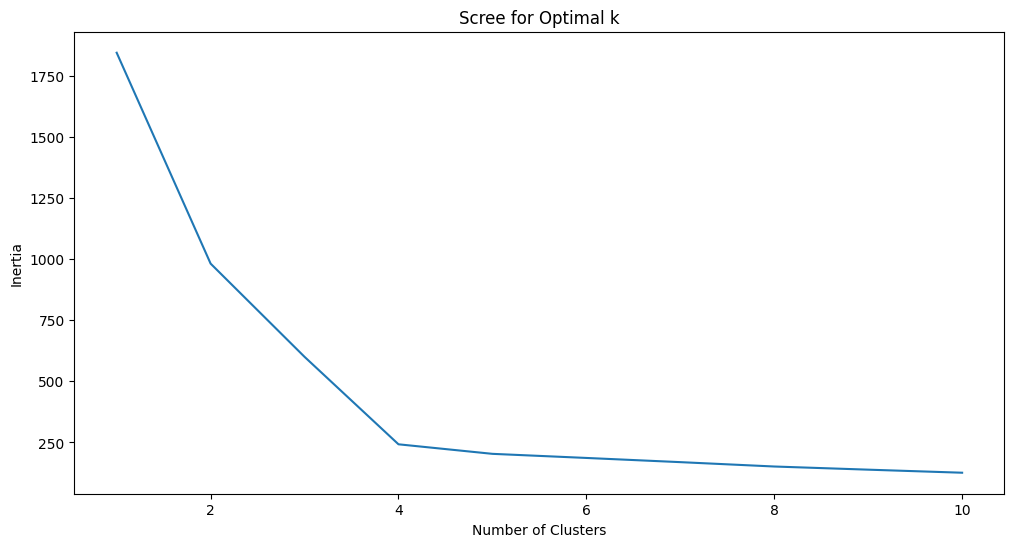

In [69]:
#Fitting means for k= 1 through 10
inertia = []
for k in range(1,11):
  cluster = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
  cluster = cluster.fit(x_train_scaled)
  inertia.append(cluster.inertia_)
inertia

#Elbow Graph
plt.figure(figsize=(12,6))
plt.plot(range(1,11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree for Optimal k')
plt.show()

The optimal k given kmc seems to be around 4 where the graph starts to decrease more slowly.

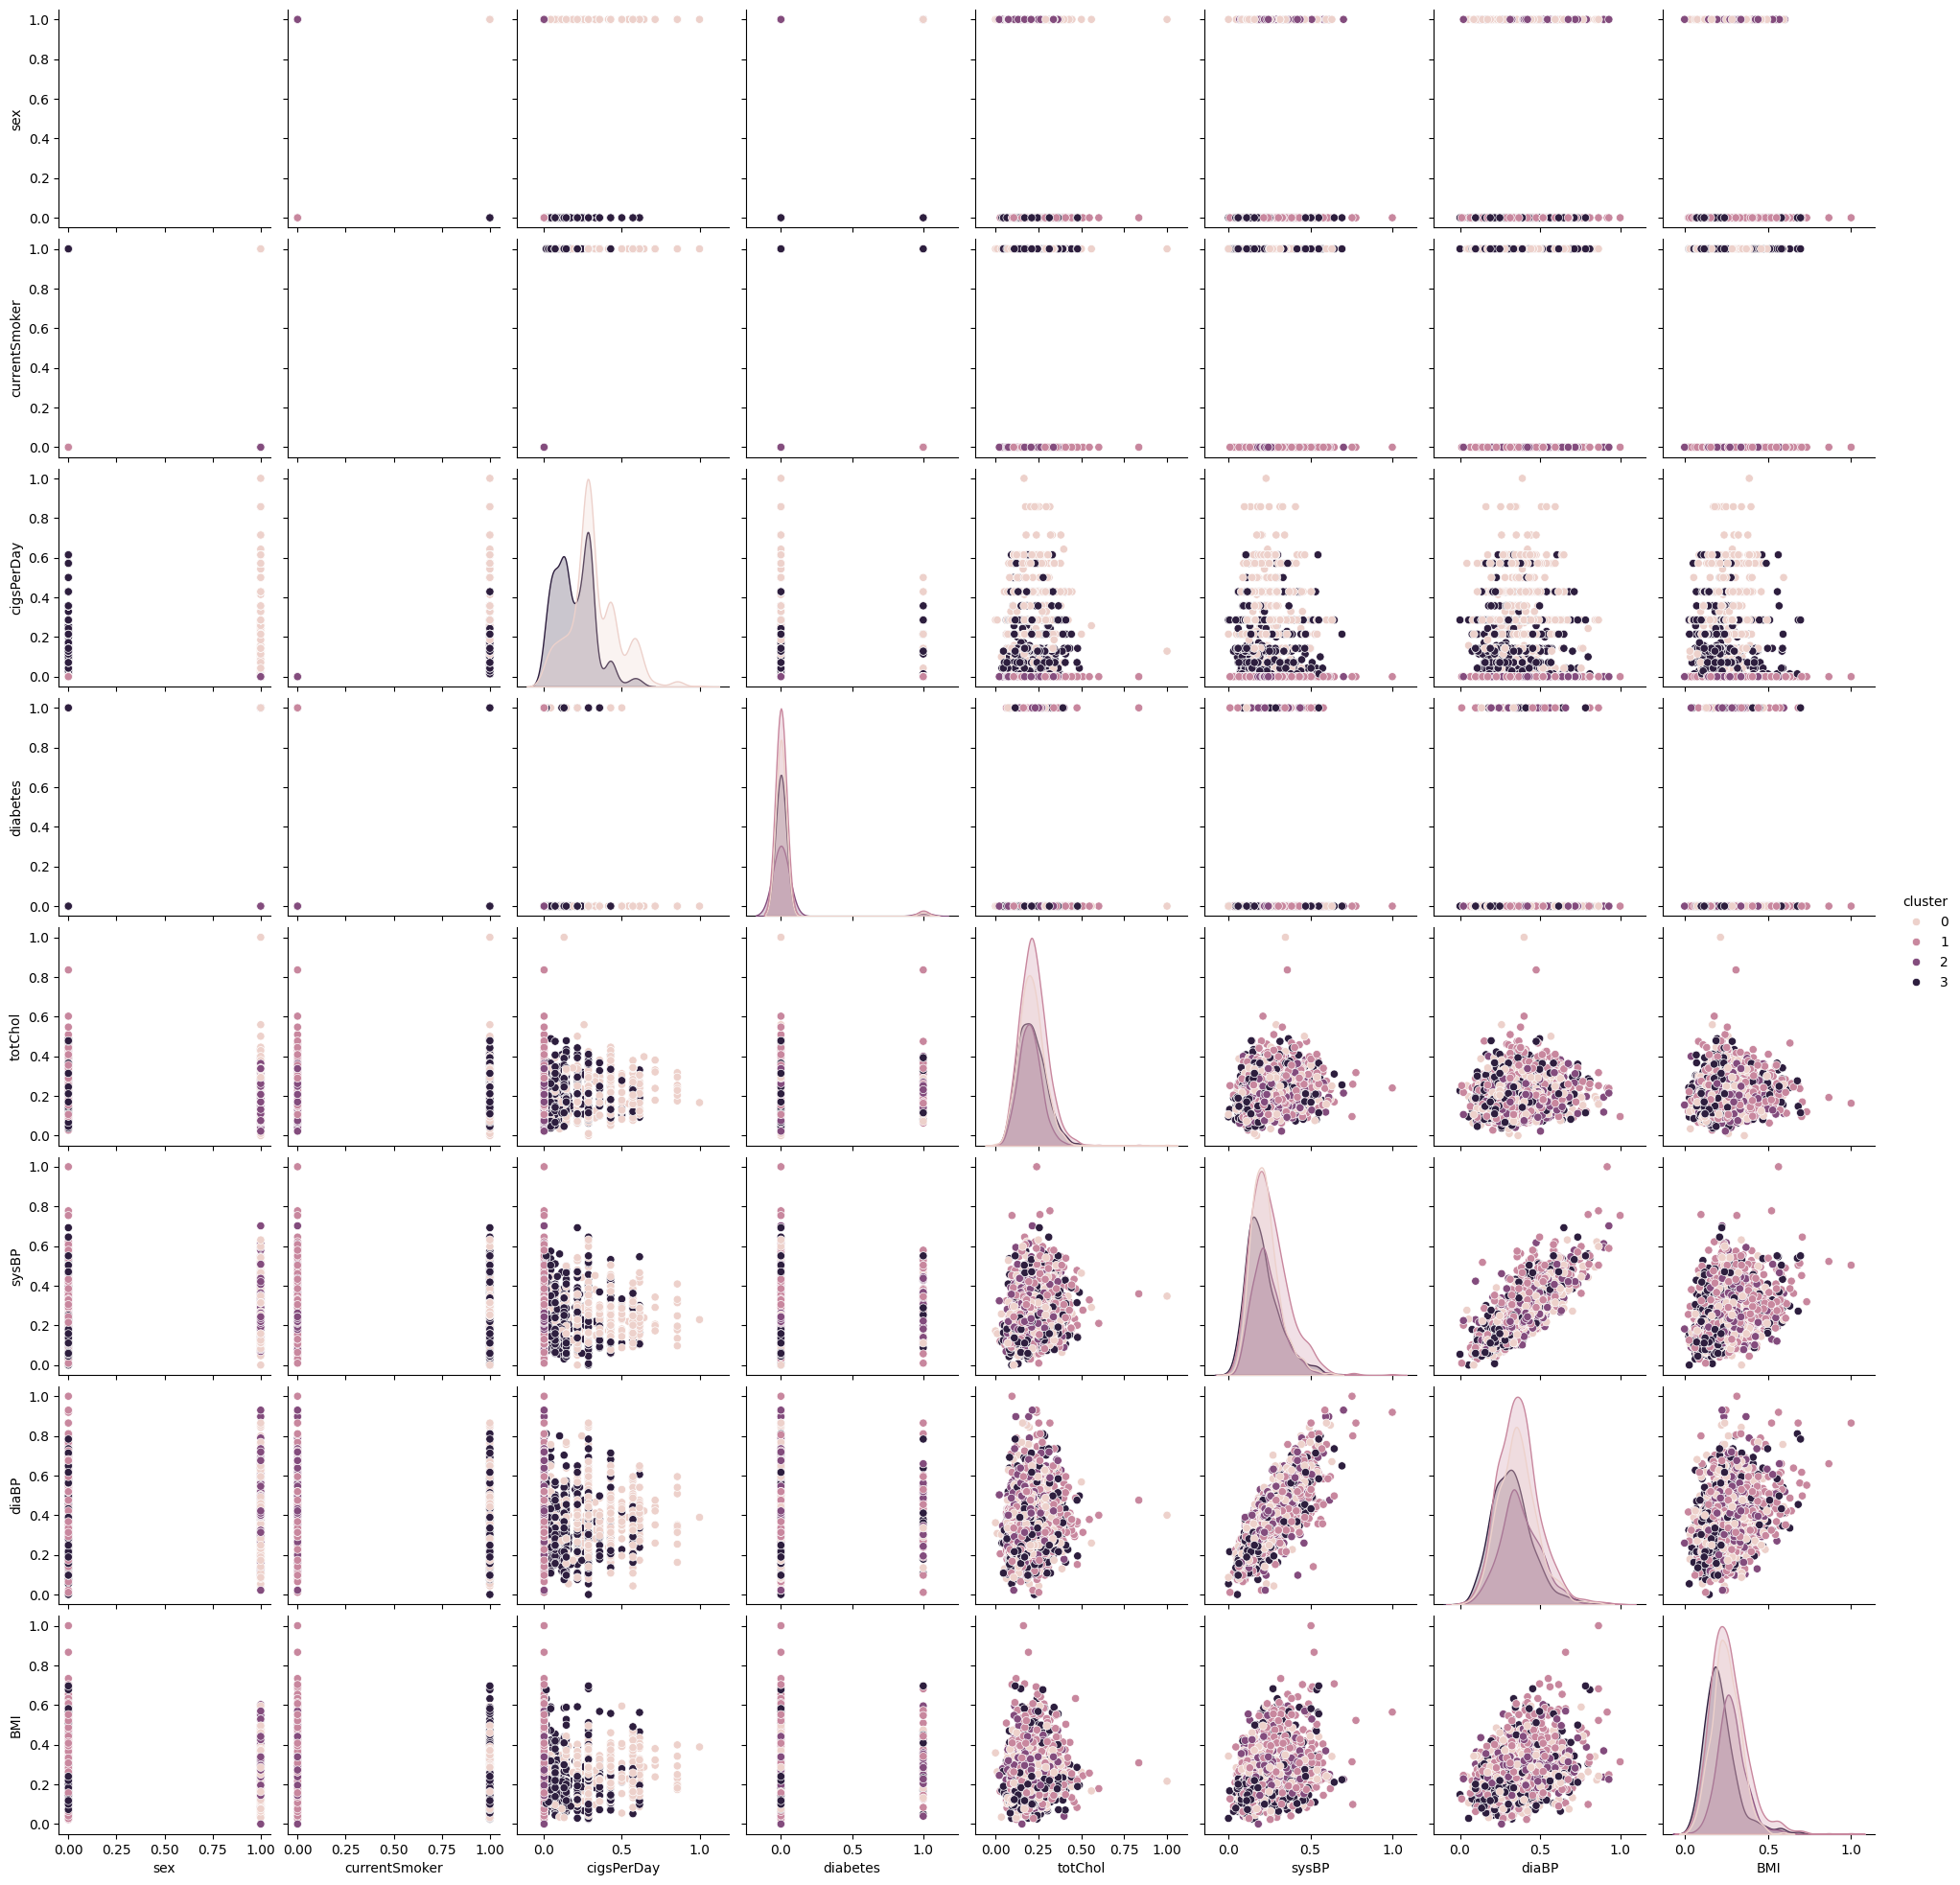

In [68]:
#Refitting KMC w/ optimal k
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

cluster = KMeans(n_clusters=4, max_iter=300, n_init=10, random_state=0)
cluster = cluster.fit(x_train_scaled_df)
x_train_scaled_df['cluster'] = cluster.labels_

sns.pairplot(data=x_train_scaled_df, hue='cluster')